#<font color = 'shade'> **Classification on the ‘credit-g’ dataset using KNN Classification**

# <font color = 'shade'>**Import/Install the packages**

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import feature_engine

In [ ]:
print(feature_engine.__version__)

1.6.2


In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.3.1


In [ ]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# For splitting the dataset
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropFeatures

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder

# For scaling the data
from sklearn.preprocessing import StandardScaler

# creating pipelines
from sklearn.pipeline import Pipeline

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Using KNN classification for our data
from sklearn.neighbors import KNeighborsClassifier

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# We will use this to download the Dataset
from sklearn.datasets import fetch_openml

# feature engine log transformation
from feature_engine.transformation import LogTransformer

# feature engine wrapper
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

# <font color = 'shade'> **Specify Project Folder Location**

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

base_folder = Path('/content/drive/MyDrive/Applied_ML/Class_4/Assignment')


In [ ]:
data_folder = base_folder/'Datasets'
save_model_folder = base_folder/'Model'
custom_function_folder = Path('/content/drive/MyDrive/Applied_ML/Class_4/Assignment/Custom_function')
save_model_folder.mkdir(exist_ok=True, parents=True)

# <font color = 'shade'> **Import Custom Functions from Python file**

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Applied_ML/Class_4/Assignment/Custom_function']

In [ ]:
from  plot_learning_curve import plot_learning_curve

In [ ]:
from eda_plots import diagnostic_plots, plot_target_by_category

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
import zipfile

with zipfile.ZipFile(data_folder/'seoul+bike+sharing+demand.zip', 'r') as zip_ref:
    zip_ref.extractall(data_folder)


#  <font color ='shade'>**KNN Regression on Bike Sharing Dataset**

- Download the data from following link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand'



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Applied_ML/Class_4/Assignment/Datasets/SeoulBikeData.csv', encoding='latin-1')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec


##  <font color ='shade'>**Do the EDA and identify the preprocessing steps.**

In [ ]:
data.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
data.info('columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Dropping Date column as it is not needed for prediction

In [ ]:
data.drop('Date',axis=1, inplace=True)

In [ ]:
data.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
data.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
data.duplicated().any()

False

We see that Solar radiation, Rainfall and Snowfall have most of data points close to each other with some outliers, so converting those 3 columns into 3 categories

There are no missing data points in the dataframe

In [ ]:
categorical = [var for var in data.columns if data[var].dtype == 'O'and var not in ['Rented Bike Count']]
discrete = [var for var in data.columns if data[var].dtype != 'O'and len(data[var].unique()) < 20 and var not in ['Rented Bike Count']]
continuous = [var for var in data.columns if data[var].dtype != 'O' and var not in discrete and var not in ['Rented Bike Count']]

In [ ]:
categorical

['Seasons', 'Holiday', 'Functioning Day']

In [ ]:
discrete

[]

In [ ]:
continuous

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
categorical_distribution = data[categorical].nunique()
print(categorical_distribution)

Seasons            4
Holiday            2
Functioning Day    2
dtype: int64


In [ ]:
continuous_distribution = data[continuous].nunique()
print(continuous_distribution)

Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
dtype: int64


In [ ]:
for key,values in continuous_distribution.items():
  print(key ,":" ,values)


Hour : 24
Temperature(°C) : 546
Humidity(%) : 90
Wind speed (m/s) : 65
Visibility (10m) : 1789
Dew point temperature(°C) : 556
Solar Radiation (MJ/m2) : 345
Rainfall(mm) : 61
Snowfall (cm) : 51


In [ ]:
for key,values in categorical_distribution.items():
  print(key,";",values)

Seasons ; 4
Holiday ; 2
Functioning Day ; 2


In [ ]:
def rare_cat(df,var):
  cat_freq = 100* data[var].value_counts(normalize = True)
  fig = cat_freq.sort_values(ascending = False).plot.bar()
  fig.axhline(y=5, color='red')
  fig.set_ylabel('category percentage frequency')
  fig.set_xlabel(var)
  fig.set_title(f'Identifying Rare Categories for {var}')
  plt.show()


In [ ]:
data[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


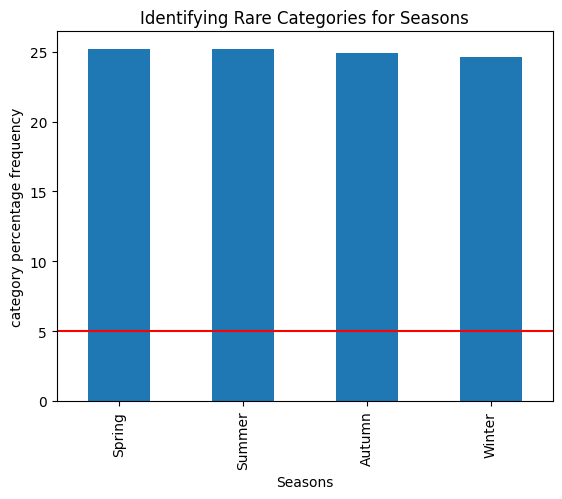

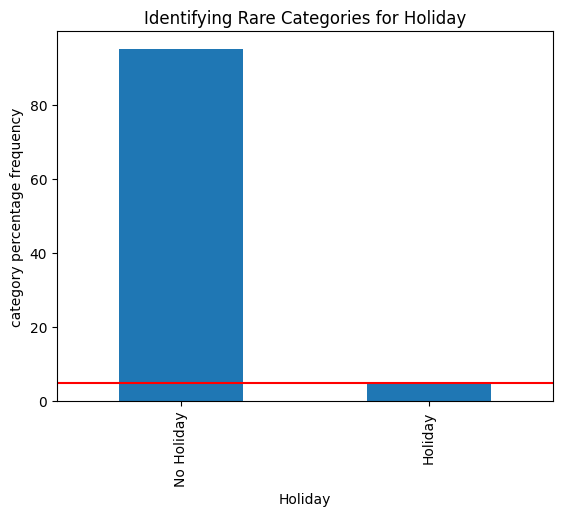

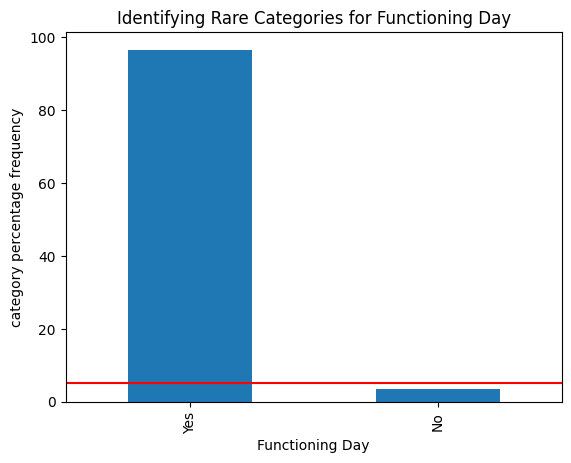

In [ ]:
for var in categorical:
  rare_cat(data,var)


Now lets see distribution for continuous variables . No of rare categories = 2


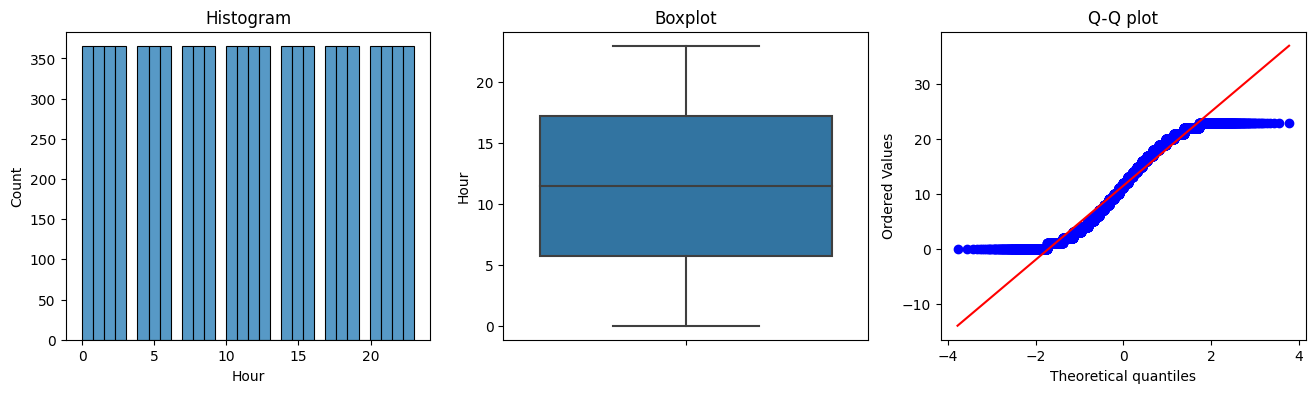

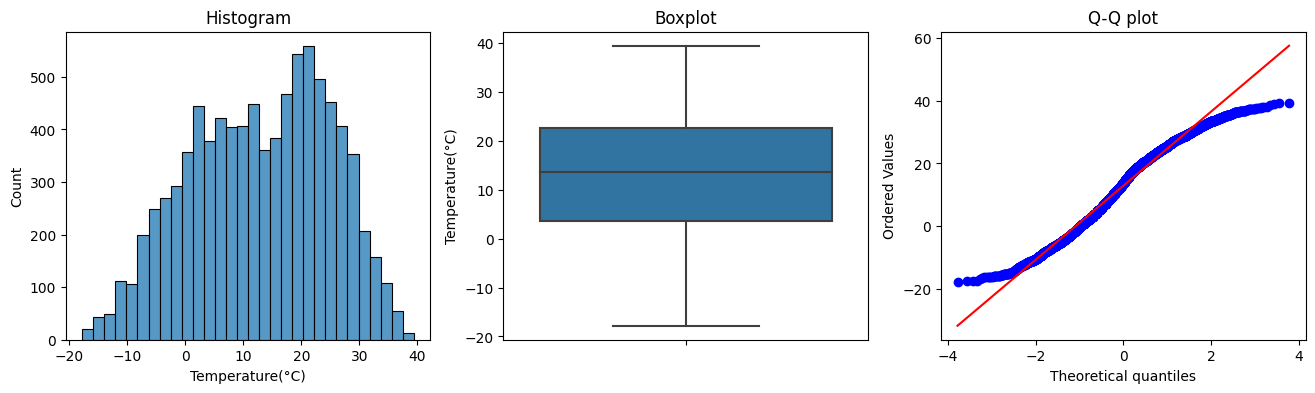

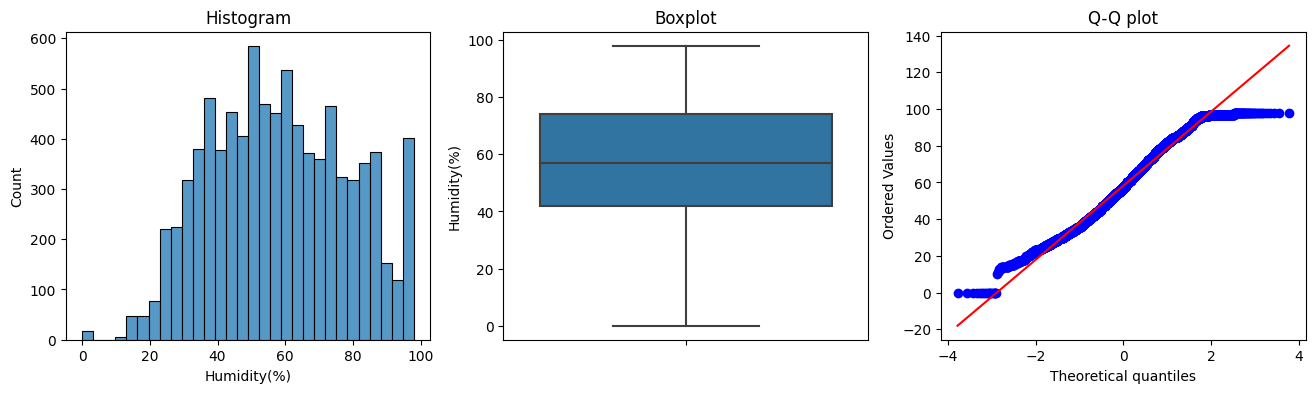

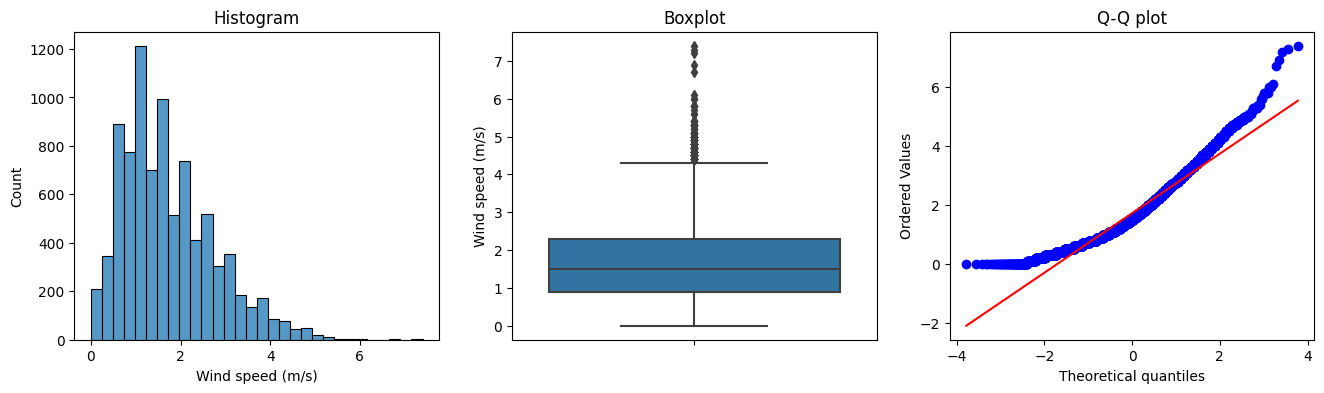

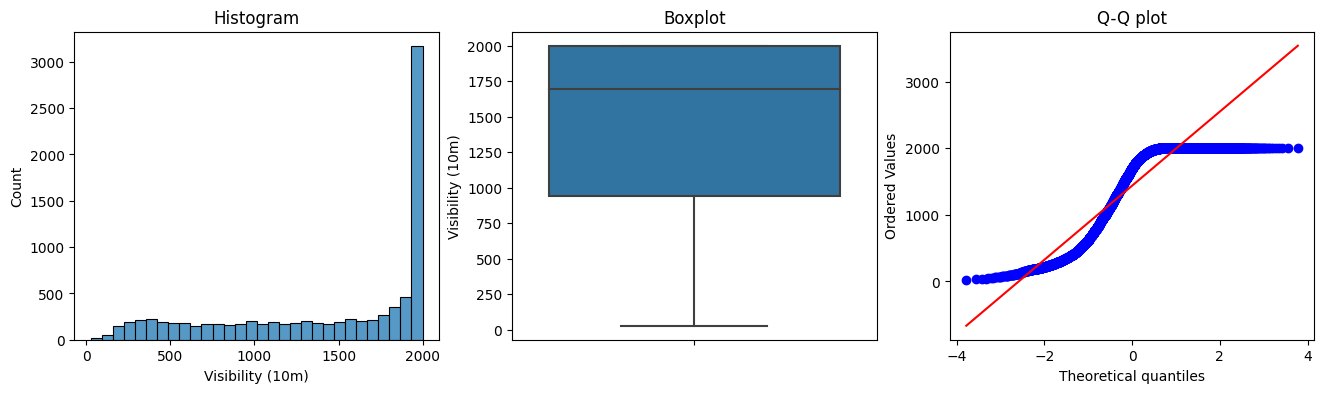

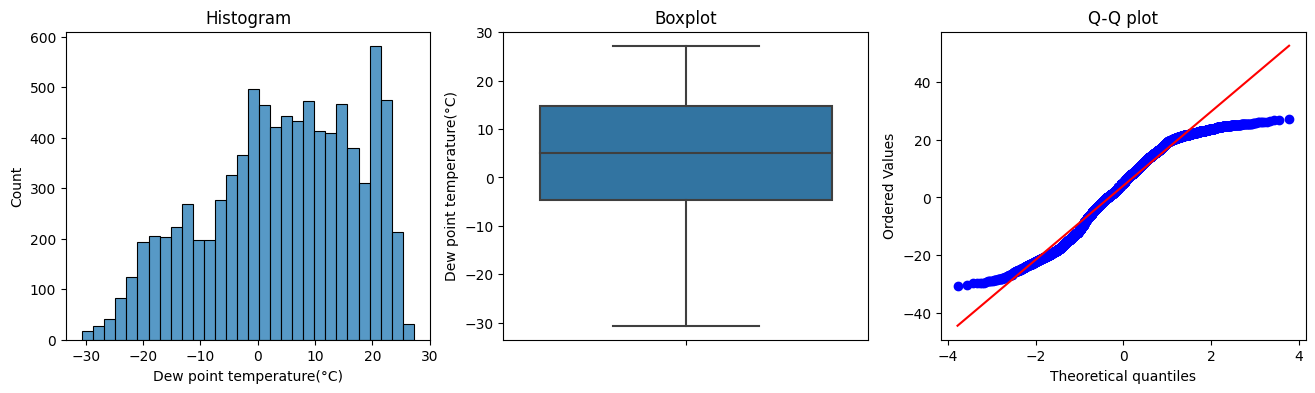

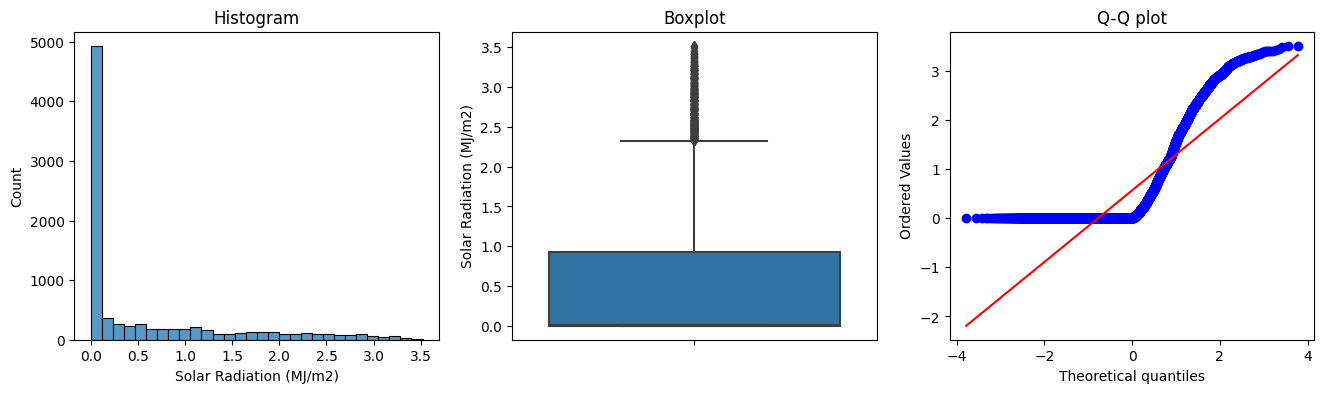

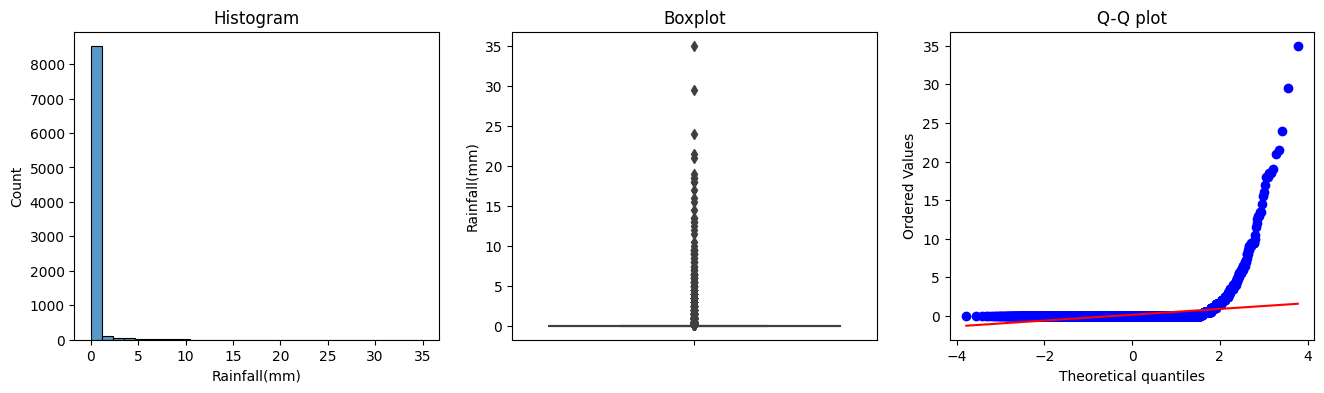

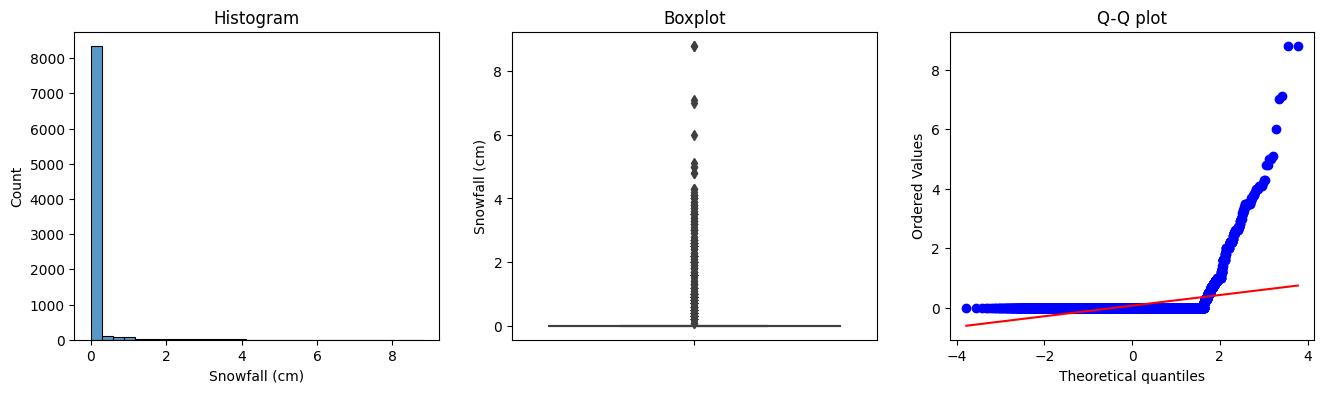

In [ ]:
for var in continuous:
    diagnostic_plots(data,var)

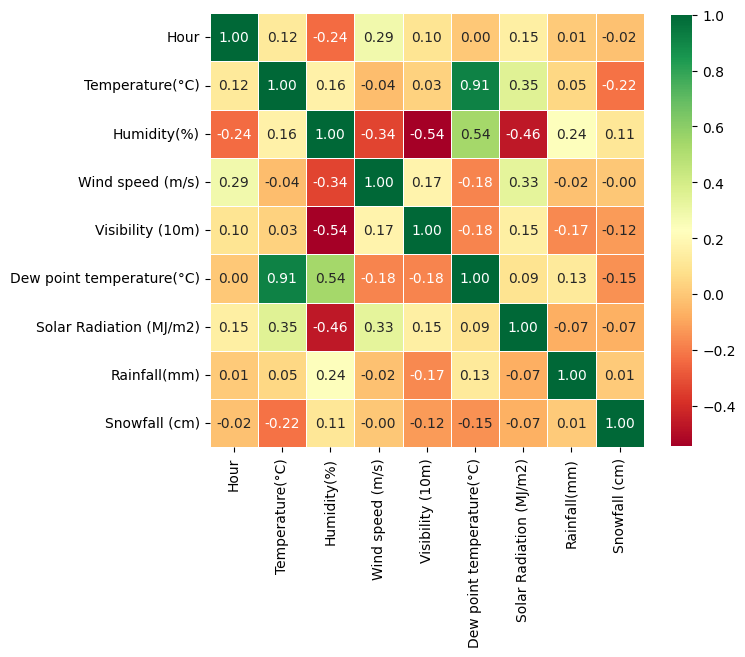

In [ ]:
corrmat = data[continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(data[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

As we see 91% correlation between drew point temp and Temp & 54%  drew point temp and Humidity.

It would be better if we drop drew point temp

In [ ]:
#col_removal = 'Dew point temperature(°C)'
#continuous = [var for var in continuous if var != col_removal]
#continuous

In [ ]:
#corrmat = data[continuous].corr().round(2)
#top_corr_features = corrmat.index
#plt.figure(figsize=(7, 7))
#sns.heatmap(data[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            #cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

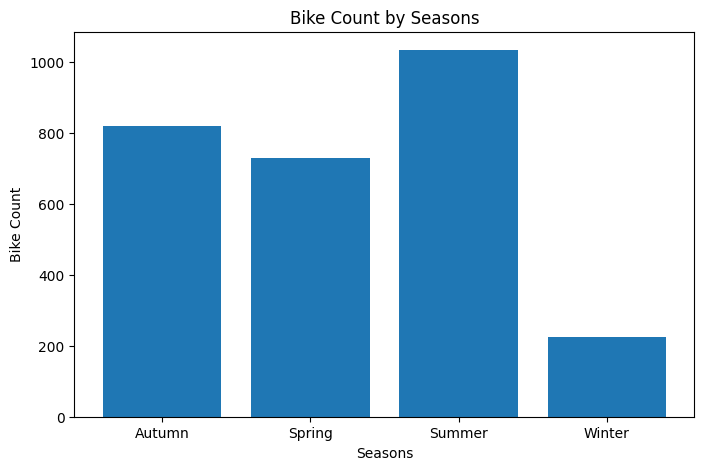

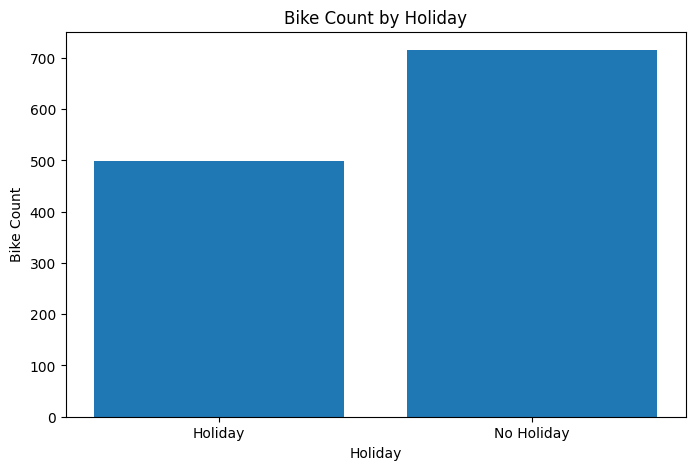

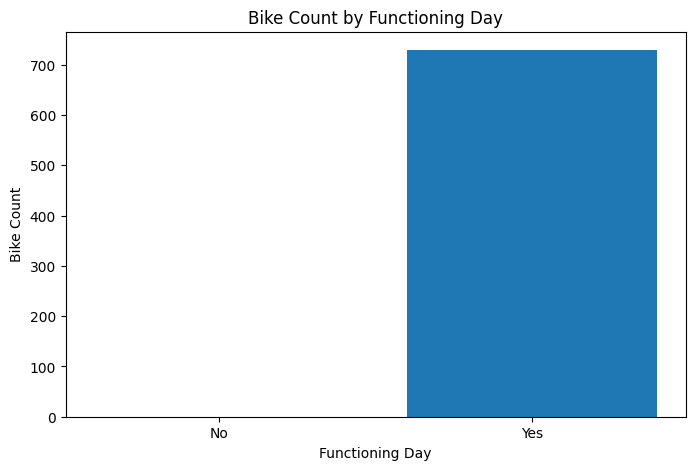

In [ ]:
for category in categorical :
  plot_target_by_category(data, 'Rented Bike Count',category,'Bike Count')

## **Colncusions**

1. We do not have any missing values or single value columns

2. Drew point Temparature is highly correlated with Temparature and Humidity. Removing Dew point to reduce Endogenity problems
3. Windspeed, Rainfall, Snowfall and Rainfall are left skewed and have a lot of outliers. Log Transformation or Seggregating them into Categories would be a better option.
4. There are 2 columns with Rare categories. Will use rate Categories encoder. 'Functioning Day' & 'Hour'
5. We have categorical variables in the data frame that should be converted into numerical before we run our model. Hence we need to do encoding of categorical variables.
6. Finally we will need to make sure that the continuos variables have same scale. We will need to do feature scaling for continuos variables and discrete variables.


##  <font color ='shade'>**Create a pipeline of regressor and preprocessing steps**
In this HW you will use KNNRegression. Use gridserach to fine tune your pipeline. The aim of the piepline is to predict the rented bike count.


bin_edges = [-0.1, 0.5, 2.5, 40.0]
bin_labels = ['Low', 'Medium', 'High']


data['Solar Radiation_categorized'] = pd.cut(data['Solar Radiation (MJ/m2)'], bins=bin_edges, labels=bin_labels)
data['Rainfall_categorized'] = pd.cut(data['Rainfall(mm)'], bins=bin_edges, labels=bin_labels)
data['Snowfall_categorized'] = pd.cut(data['Snowfall (cm)'], bins=bin_edges, labels=bin_labels)

data.info()

for var in ['Solar Radiation_categorized','Rainfall_categorized','Snowfall_categorized']:
  data[var] = data[var].astype('object')#

data.info()

#data = data.drop(columns = ['Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'])

In [ ]:
X = data.drop(['Rented Bike Count'], axis=1)
y = data['Rented Bike Count']
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.33)

In [ ]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [ ]:
print(X_train.count(), y_train.count())

Hour                         5869
Temperature(°C)              5869
Humidity(%)                  5869
Wind speed (m/s)             5869
Visibility (10m)             5869
Dew point temperature(°C)    5869
Solar Radiation (MJ/m2)      5869
Rainfall(mm)                 5869
Snowfall (cm)                5869
Seasons                      5869
Holiday                      5869
Functioning Day              5869
dtype: int64 5869


As Hour has value 0 in it, one hot encoder wll only run positive values, so adding 1 to every hour

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
columns_to_drop = ['Dew point temperature(°C)']

In [ ]:
columns_to_transform = ['Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','Hour','Solar Radiation (MJ/m2)']

In [ ]:
columns_to_scale = ['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
rare_labels =['Functioning Day']

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class ConvertToNumpyArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(X)

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection.drop_correlated_features import Variables


processing_steps = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('array_conversion',ConvertToNumpyArray()),
    ('knn',KNeighborsRegressor())
    ])

In [ ]:
param_grid = {'knn__n_neighbors':np.arange(6,21,1)}
grid_knn = GridSearchCV(processing_steps,param_grid=param_grid, cv= 5 , return_train_score=True)

In [ ]:
grid_knn.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn.best_params_}')
print(f'Best cross vallidation score is {grid_knn.best_score_}')

Best parameter is {'knn__n_neighbors': 8}
Best cross vallidation score is 0.48871784333597235


In [ ]:
print(f'Test score is {grid_knn.score(X_test,y_test)}')

Test score is 0.47065176187629376


Now lets try with different parameters with the range of 1-20 with step of 2

In [ ]:
param_grid_2 = {'knn__n_neighbors':np.arange(1,51,6)}
grid_knn_2 = GridSearchCV(processing_steps,param_grid=param_grid_2, cv= 5 , return_train_score=True)

In [ ]:
grid_knn_2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 1,  7, 13, 19, 25, 31, 37, 43, 49])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn_2.best_params_}')
print(f'Best cross vallidation score is {grid_knn_2.best_score_}')

Best parameter is {'knn__n_neighbors': 7}
Best cross vallidation score is 0.4878761519949233


In [ ]:
print(f'Test score is {grid_knn_2.score(X_test,y_test)}')

Test score is 0.47173795980209543


Lets use shuffle & split cross validation

In [ ]:
param_grid_3 = {'knn__n_neighbors':np.arange(1,11,1)}
kfold = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
grid_knn_3 = GridSearchCV(processing_steps,param_grid=param_grid_3, cv= kfold , return_train_score=True)

In [ ]:
grid_knn_3.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn_3.best_params_}')
print(f'Best cross vallidation score is {grid_knn_3.best_score_}')

Best parameter is {'knn__n_neighbors': 9}
Best cross vallidation score is 0.49116674370665203


In [ ]:
print(f'Test score is {grid_knn_3.score(X_test,y_test)}')

Test score is 0.46923793040531203


In [ ]:
param_grid_4 = {'knn__n_neighbors':np.arange(1,11,1)}
grid_knn_4 = GridSearchCV(processing_steps,param_grid=param_grid_4, cv= 5 , return_train_score=True)

In [ ]:
grid_knn_4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn_4.best_params_}')
print(f'Best cross vallidation score is {grid_knn_4.best_score_}')

Best parameter is {'knn__n_neighbors': 8}
Best cross vallidation score is 0.48871784333597235


In [ ]:
print(f'Test score is {grid_knn_4.score(X_test,y_test)}')

Test score is 0.47065176187629376


Lets try without Rare Label Encoder

In [ ]:

processing_steps_2 = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('array_conversion',ConvertToNumpyArray()),
    ('knn',KNeighborsRegressor())
    ])

In [ ]:
param_grid_5 = {'knn__n_neighbors':np.arange(1,11,1)}
grid_knn_5 = GridSearchCV(processing_steps_2,param_grid=param_grid_5, cv= 5 , return_train_score=True)

In [ ]:
grid_knn_5.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn_5.best_params_}')
print(f'Best cross vallidation score is {grid_knn_5.best_score_}')

Best parameter is {'knn__n_neighbors': 8}
Best cross vallidation score is 0.48871784333597235


In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection.drop_correlated_features import Variables


processing_steps_3 = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('scaler',StandardScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('knn',KNeighborsRegressor())
    ])

In [ ]:
param_grid_6 = {'knn__n_neighbors':np.arange(1,11,1)}
grid_knn_6 = GridSearchCV(processing_steps_3,param_grid=param_grid_6, cv= 5 , return_train_score=True)

In [ ]:
grid_knn_6.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Date',
                                                                 'Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('scaler', StandardScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn_6.best_params_}')
print(f'Best cross vallidation score is {grid_knn_6.best_score_}')

Best parameter is {'knn__n_neighbors': 2}
Best cross vallidation score is 0.6792349987321247


When using Standard scaler, we get good CV score.Lets explore with different parameters


In [ ]:
param_grid_7 = {'knn__n_neighbors':np.arange(1,21,5)}
grid_knn_7 = GridSearchCV(processing_steps_3,param_grid=param_grid_7, cv= 5 , return_train_score=True)

In [ ]:
grid_knn_7.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Date',
                                                                 'Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('scaler', StandardScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 1,  6, 11, 16])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn_7.best_params_}')
print(f'Best cross vallidation score is {grid_knn_7.best_score_}')

Best parameter is {'knn__n_neighbors': 6}
Best cross vallidation score is 0.7832774230744043


In [ ]:
param_grid_8 = {'knn__n_neighbors':np.arange(4,8,1)}
grid_knn_8 = GridSearchCV(processing_steps_3,param_grid=param_grid_8, cv= 5 , return_train_score=True)

NameError: ignored

In [ ]:
grid_knn_8.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('scaler', StandardScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([4, 5, 6, 7])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn_8.best_params_}')
print(f'Best cross vallidation score is {grid_knn_8.best_score_}')

Best parameter is {'knn__n_neighbors': 5}
Best cross vallidation score is 0.7852097387187529


Lets try with MinMax scaler

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection.drop_correlated_features import Variables


processing_steps_4 = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('knn',KNeighborsRegressor())
    ])

In [ ]:
param_grid_9 = {'knn__n_neighbors':np.arange(1,11,1)}
grid_knn_9 = GridSearchCV(processing_steps_4,param_grid=param_grid_9, cv= 5 , return_train_score=True)

In [ ]:
grid_knn_9.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Date',
                                                                 'Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('scaler', MinMaxScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn_9.best_params_}')
print(f'Best cross vallidation score is {grid_knn_9.best_score_}')

Best parameter is {'knn__n_neighbors': 2}
Best cross vallidation score is 0.6840493055684189


As this is a big data set, ets try with shuffle split cross validation

In [ ]:
param_grid_10 = {'knn__n_neighbors':np.arange(1,11,1)}
kfold2 = ShuffleSplit(n_splits = 5, test_size=0.25,random_state=0)
grid_knn_10 = GridSearchCV(processing_steps_4,param_grid=param_grid_10,cv=kfold2,return_train_score=True)

In [ ]:
grid_knn_10.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=Tru...
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('scaler', MinMaxScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True)

In [ ]:
print(f'Best parameter is {grid_knn_10.best_params_}')
print(f'Best cross vallidation score is {grid_knn_10.best_score_}')

Best parameter is {'knn__n_neighbors': 4}
Best cross vallidation score is 0.7786887001857846


We see that grid_knn_9 is better with mean CV dcore of .7918 and knn=5.
Lets test the model with that

In [ ]:
print(f'The test score of the grid_9 odel is {grid_knn_9.score(X_test,y_test)}')

The test score of the grid_9 odel is 0.8034474017869272


I would consider my Model 9 as the better model.